#### 히트맵

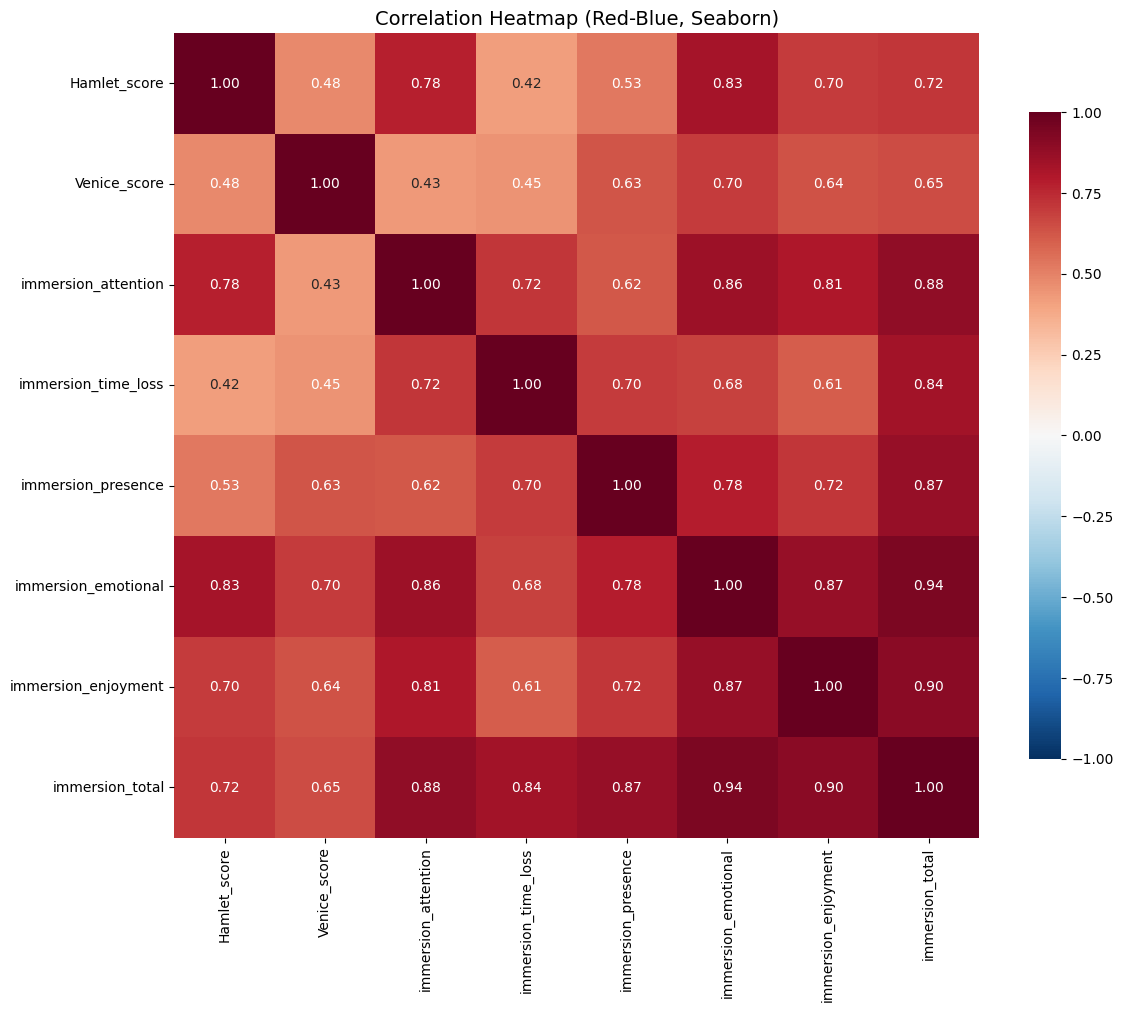

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) 데이터 불러오기
df = pd.read_csv("../data/questionnaire/final_scores_with_immersion.csv")

# 2) 수치형 컬럼만 선택 + 분산 0 컬럼 제거
num_df = df.select_dtypes(include=[np.number]).copy()
zero_var_cols = [c for c in num_df.columns if num_df[c].std(ddof=0) == 0]
num_df = num_df.drop(columns=zero_var_cols, errors="ignore")

# 3) 상관계수 계산
corr = num_df.corr()

# 4) 시각화 (seaborn)
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,       # 상관계수 값 표시
    fmt=".2f",        # 소수점 2자리
    cmap="RdBu_r",    # 빨강–파랑 반전
    vmin=-1, vmax=1,  # 색상 범위 고정
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap (Red-Blue, Seaborn)", fontsize=14)
plt.tight_layout()
plt.show()

#### 그룹 간 차이

#####
H₀(귀무가설): GEQ Total 점수와 consistency 점수 사이에는 상관관계가 없다. (ρ = 0)

H₁(대립가설): GEQ Total 점수와 consistency 점수 사이에는 상관관계가 있다. (ρ ≠ 0)

In [9]:
from scipy.stats import pearsonr

# 분석 대상 변수들
geq_total = df['immersion_total']

# Hamlet 버전
hamlet_df = df[['immersion_total', 'Hamlet_score']].dropna()
corr_h, p_h = pearsonr(hamlet_df['immersion_total'], hamlet_df['Hamlet_score'])

# Venice 버전
venice_df = df[['immersion_total', 'Venice_score']].dropna()
corr_v, p_v = pearsonr(venice_df['immersion_total'], venice_df['Venice_score'])

# 결과 출력
print("Hamlet 버전 → 상관계수:", corr_h, "p-값:", p_h)
if p_h < 0.05:
    print("  → 유의함 (p<0.05)")
else:
    print("  → 유의하지 않음 (p≥0.05)")

print("Venice 버전 → 상관계수:", corr_v, "p-값:", p_v)
if p_v < 0.05:
    print("  → 유의함 (p<0.05)")
else:
    print("  → 유의하지 않음 (p≥0.05)")

Hamlet 버전 → 상관계수: 0.7176590546209655 p-값: 7.888058857992004e-05
  → 유의함 (p<0.05)
Venice 버전 → 상관계수: 0.6512594392866148 p-값: 0.0005669607418715424
  → 유의함 (p<0.05)


두 경우(Hamlet/ Venice) 모두 유의 → GEQ Total과 consistency 점수 사이에는 통계적으로 유의한 선형 상관관계가 존재

#####
H₀(귀무가설): Response Length와 consistency 점수 사이에는 상관관계가 없다. (ρ = 0)

H₁(대립가설): Response Length와 consistency 점수 사이에는 상관관계가 있다. (ρ ≠ 0)

In [10]:
df1 = pd.read_csv("../processed_output/all_data_combined.csv")

In [14]:
import pandas as pd


# 3) Response Length 컬럼명 확인
print(df1.columns)

# 예시: Response Length가 'response_length'라는 컬럼명이라고 가정
# 실제 데이터에 맞게 이름 변경 필요
response_col = 'ResponseLength'

# -------------------------------
# Hamlet_score 버전
merged_hamlet = pd.concat([df['Hamlet_score'], df1[response_col]], axis=1).dropna()
corr_h, p_h = pearsonr(merged_hamlet[response_col], merged_hamlet['Hamlet_score'])

# Venice_score 버전
merged_venice = pd.concat([df['Venice_score'], df1[response_col]], axis=1).dropna()
corr_v, p_v = pearsonr(merged_venice[response_col], merged_venice['Venice_score'])

# -------------------------------
# 결과 출력
print(f"Hamlet 버전 → 상관계수: {corr_h:.3f}, p값: {p_h:.4f}")
if p_h < 0.05:
    print("  → 귀무가설 기각, 유의한 상관관계 존재")
else:
    print("  → 귀무가설 채택, 유의한 상관관계 없음")

print(f"Venice 버전 → 상관계수: {corr_v:.3f}, p값: {p_v:.4f}")
if p_v < 0.05:
    print("  → 귀무가설 기각, 유의한 상관관계 존재")
else:
    print("  → 귀무가설 채택, 유의한 상관관계 없음")


Index(['SessionID', 'TurnIndex', 'CharacterName', 'PlayerResponse',
       'ResponseLength', 'ResponseTime', 'AIResponseText', 'AIResponseLength',
       'EngagementRatio', 'LabelType', 'LabelSource', 'SourceFile'],
      dtype='object')
Hamlet 버전 → 상관계수: 0.306, p값: 0.1459
  → 귀무가설 채택, 유의한 상관관계 없음
Venice 버전 → 상관계수: 0.043, p값: 0.8410
  → 귀무가설 채택, 유의한 상관관계 없음


두 경우(Hamlet/ Venice) 모두 유의하지 않음 → ResponseLength과 consistency 점수 사이에는 통계적으로 유의한 선형 상관관계가 존재하지 않음

#####
H₀(귀무가설): 몰입 지수와 consistency 점수 사이에는 상관관계가 없다. (ρ = 0)

H₁(대립가설): 몰입 지수와 consistency 점수 사이에는 상관관계가 있다. (ρ ≠ 0)

In [20]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

# 2) 필수 컬럼 확인
need_df  = {"ID", "immersion_total", "Hamlet_score", "Venice_score"}
need_df1 = {"SessionID", "ResponseLength", "LabelSource"}
miss_df  = need_df - set(df.columns)
miss_df1 = need_df1 - set(df1.columns)
if miss_df:
    raise ValueError(f"df에 필요한 컬럼 없음: {sorted(miss_df)}")
if miss_df1:
    raise ValueError(f"df1에 필요한 컬럼 없음: {sorted(miss_df1)}")

# 3) 세션×라벨별 ResponseLength 로그 집계
df1 = df1.copy()
df1["log_ResponseLength"] = np.log(df1["ResponseLength"] + 1.0)

agg = (
    df1.groupby(["SessionID", "LabelSource"], as_index=False)
       .agg(mean_log_len=("log_ResponseLength", "mean"),
            n=("log_ResponseLength", "size"))
)

# 라벨별로 피벗(또는 분리 후 조인)
pivot = agg.pivot(index="SessionID", columns="LabelSource", values="mean_log_len")
pivot = pivot.rename(columns={"H": "mean_log_len_H", "M": "mean_log_len_M"}).reset_index()

# 4) 점수 DF와 세션 매칭(ID ↔ SessionID)
merged = df.merge(pivot, left_on="ID", right_on="SessionID", how="left")

# 5) 몰입 지수 계산
# immersion_index_H = immersion_total × mean_log_len_H
# immersion_index_M = immersion_total × mean_log_len_M
merged["immersion_index_H"] = merged["immersion_total"] * merged["mean_log_len_H"]
merged["immersion_index_M"] = merged["immersion_total"] * merged["mean_log_len_M"]

# 6) 상관 검정 함수(안전장치 포함)
def corr_test(x, y, alpha=0.05, method="pearson"):
    tmp = pd.concat([x, y], axis=1).dropna()
    if len(tmp) < 2:
        return {"n": len(tmp), "r": None, "p": None, "decision": "표본 부족(<2)"}
    if np.isclose(tmp.iloc[:,0].std(ddof=1), 0) or np.isclose(tmp.iloc[:,1].std(ddof=1), 0):
        return {"n": len(tmp), "r": None, "p": None, "decision": "분산 0(상수열)"}
    if method == "pearson":
        r, p = pearsonr(tmp.iloc[:,0], tmp.iloc[:,1])
    elif method == "spearman":
        r, p = spearmanr(tmp.iloc[:,0], tmp.iloc[:,1])
    else:
        raise ValueError("method must be 'pearson' or 'spearman'")
    decision = "H0 기각(유의)" if p < alpha else "H0 채택(유의 아님)"
    return {"n": len(tmp), "r": r, "p": p, "decision": decision}

alpha = 0.05

# 7) H 그룹: 몰입 지수(H) vs Hamlet_score
res_H = corr_test(merged["immersion_index_H"], merged["Hamlet_score"], alpha, method="pearson")

# 8) M 그룹: 몰입 지수(M) vs Venice_score
res_M = corr_test(merged["immersion_index_M"], merged["Venice_score"], alpha, method="pearson")

# 9) 결과 출력(피어슨). 필요하면 Spearman도 함께 보고 싶을 때 주석 해제
print("=== Pearson correlation tests (α=0.05) ===")
print(f"[H 그룹: immersion_index_H vs Hamlet_score] n={res_H['n']}, r={res_H['r']}, p={res_H['p']} → {res_H['decision']}")
print(f"[M 그룹: immersion_index_M vs Venice_score] n={res_M['n']}, r={res_M['r']}, p={res_M['p']} → {res_M['decision']}")

# Spearman도 확인:
res_H_sp = corr_test(merged["immersion_index_H"], merged["Hamlet_score"], alpha, method="spearman")
res_M_sp = corr_test(merged["immersion_index_M"], merged["Venice_score"], alpha, method="spearman")
print("\n=== Spearman correlation tests (α=0.05) ===")
print(f"[H 그룹: immersion_index_H vs Hamlet_score] n={res_H_sp['n']}, ρ={res_H_sp['r']}, p={res_H_sp['p']} → {res_H_sp['decision']}")
print(f"[M 그룹: immersion_index_M vs Venice_score] n={res_M_sp['n']}, ρ={res_M_sp['r']}, p={res_M_sp['p']} → {res_M_sp['decision']}")

=== Pearson correlation tests (α=0.05) ===
[H 그룹: immersion_index_H vs Hamlet_score] n=23, r=0.6526286165915337, p=0.0007370081194499555 → H0 기각(유의)
[M 그룹: immersion_index_M vs Venice_score] n=23, r=0.6263509952717627, p=0.001385974189491132 → H0 기각(유의)

=== Spearman correlation tests (α=0.05) ===
[H 그룹: immersion_index_H vs Hamlet_score] n=23, ρ=0.5524461716999676, p=0.00626547716309473 → H0 기각(유의)
[M 그룹: immersion_index_M vs Venice_score] n=23, ρ=0.6346096720227549, p=0.001143456130442274 → H0 기각(유의)


#####
H₀: 해당 하위 요인 점수와 consistency 점수 사이에는 상관관계가 없다 (ρ = 0)

H₁: 해당 하위 요인 점수와 consistency 점수 사이에는 상관관계가 있다 (ρ ≠ 0)

이를 요인별(H₀-4 ~ H₀-8)로 적용하면:

H₀-4: immersion_attention ↔ consistency 점수(해당 그룹) 간 상관관계 없음

H₀-5: immersion_time_loss ↔ consistency 점수(해당 그룹) 간 상관관계 없음

H₀-6: immersion_presence ↔ consistency 점수(해당 그룹) 간 상관관계 없음

H₀-7: immersion_emotional ↔ consistency 점수(해당 그룹) 간 상관관계 없음

H₀-8: immersion_enjoyment ↔ consistency 점수(해당 그룹) 간 상관관계 없음

In [21]:
# 하위 요인 목록
sub_factors = [
    "immersion_attention",
    "immersion_time_loss",
    "immersion_presence",
    "immersion_emotional",
    "immersion_enjoyment"
]

# 결과 저장용
results = []

alpha = 0.05

# 각 하위 요인에 대해 Hamlet_score / Venice_score 분석
for factor in sub_factors:
    # H 그룹(Hamlet_score)
    tmp_h = df[[factor, "Hamlet_score"]].dropna()
    if len(tmp_h) >= 2:
        r_h, p_h = pearsonr(tmp_h[factor], tmp_h["Hamlet_score"])
        decision_h = "H0 기각(유의)" if p_h < alpha else "H0 채택(유의 아님)"
    else:
        r_h, p_h, decision_h = None, None, "표본 부족"
    
    # M 그룹(Venice_score)
    tmp_m = df[[factor, "Venice_score"]].dropna()
    if len(tmp_m) >= 2:
        r_m, p_m = pearsonr(tmp_m[factor], tmp_m["Venice_score"])
        decision_m = "H0 기각(유의)" if p_m < alpha else "H0 채택(유의 아님)"
    else:
        r_m, p_m, decision_m = None, None, "표본 부족"
    
    results.append({
        "Factor": factor,
        "H_group_r": r_h, "H_group_p": p_h, "H_group_decision": decision_h,
        "M_group_r": r_m, "M_group_p": p_m, "M_group_decision": decision_m
    })

# 결과를 DataFrame으로 변환
results_df = pd.DataFrame(results)

# 보기 좋게 표시
print("=== Pearson correlation test results (α=0.05) ===")
print(results_df)

=== Pearson correlation test results (α=0.05) ===
                Factor  H_group_r     H_group_p H_group_decision  M_group_r  \
0  immersion_attention   0.780682  6.770692e-06        H0 기각(유의)   0.430125   
1  immersion_time_loss   0.419544  4.126231e-02        H0 기각(유의)   0.445391   
2   immersion_presence   0.529925  7.735250e-03        H0 기각(유의)   0.626818   
3  immersion_emotional   0.834176  4.082366e-07        H0 기각(유의)   0.703007   
4  immersion_enjoyment   0.698078  1.488837e-04        H0 기각(유의)   0.640616   

   M_group_p M_group_decision  
0   0.035911        H0 기각(유의)  
1   0.029176        H0 기각(유의)  
2   0.001047        H0 기각(유의)  
3   0.000127        H0 기각(유의)  
4   0.000745        H0 기각(유의)  
